<a href="https://colab.research.google.com/github/wonkwonlee/likelion-k-digital-training-AI/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로 기초

> 인공지능의 겨울(AI Winter) 이라 불리는 시기가 두 차례 있었는데 그 중 첫 번째는 퍼셉트론의 한계를 지적한 책 **퍼셉트론**의 발간이 영향을 미쳤다.
> 
> AND, OR, XOR 연산

## 난수 Random Number
* 신경망의 초깃값을 지정해주는 것을 **초기화(Initialization)** 이라 한다.
* 현재 가장 많이 쓰이는 방법은 **Xavier 초기화(Xavier Initialization)**, **He 초기화(He Initialization)** 인데, 이 방법들은 랜덤하지만 어느 정도 규칙성이 있는 범위 내에서 난수를 지정한다.

### 균일 분포 Unifrom distribution
* 균일 분포란 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포
* tf.random.uniform() 메서드 사용
* 첫번째 인자는 결괏값의 shape, 두번째 인자는 최솟값, 세번째 인자는 최대값

In [1]:
# 텐서플로 버전 확인
import tensorflow as tf 
print(tf.__version__) 

2.4.1


In [2]:
rand = tf.random.uniform([4,2],0,1)
print(rand)

tf.Tensor(
[[0.09990346 0.2948004 ]
 [0.00809145 0.61982906]
 [0.8457402  0.63781893]
 [0.66443753 0.54506636]], shape=(4, 2), dtype=float32)


### 정규 분포 Normal Distribution
* 정규 분포는 가운데가 높고 양극단으로 갈수록 낮아지는 분포
* tf.random.normal() 메서드 사용
* 두번째 인자는 정규 분포의 평균, 세번째 인자는 정규 분포의 표준 편차
    + 평균이 0이고 표준 편차가 1일 때 표준 정규 분포라고 한다.

In [ ]:
# mean = 0, std = 1
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.40757585 -0.3489127   0.35641307  1.140465  ], shape=(4,), dtype=float32)


## 뉴런
* 입력 ➡️ 뉴런 ➡️ 출력
* 입력 x ➡️ 가중치 w ➡️ 활성화함수 f ➡️ 출력 y
* 뉴런에서 학습할 때 변하는 것은 가중치로 처음에는 초기화를 통해 랜덤한 값을 넣고 학습 과정에서 점차 일정한 값으로 수렴하게 된다.
* 학습이 잘 된다는 것은 좋은 가중치를 얻어서 원하는 출력에 점점 가까운 값을 얻는 것을 말한다.
* 활성화 함수는 시그모이드, ReLU 등이 쓰인다.
    + 신경망 초창기에는 시그모이드가 주로 쓰였으니 은닉층이 다수 사용되며 ReLU가 더 많이 쓰인다.
* 딥러닝에서 오류를 역전파(Backpropagate) 할 때 시그모이드 함수가 값이 점점 작아지는 문제로 인해 [ReLU 함수](https://www.cs.toronto.edu/~fritz/absps/reluICML.pdf)가 대안으로 제시되었다.


In [ ]:
# Sigmoid activation function
import math
def sigmoid(x):
    return 1 / (1+math.exp(-x))

In [ ]:
x = 1    # 입력값
y = 0    # 출력값
w = tf.random.normal([1],0,1)  # 초기 가중치

output = sigmoid(x * w)        # 예측값  
print(output)

0.5803337141450682


### 경사 하강법 Gradient Descent
* 실제 출력값(Output)과 기대 출력(y)의 차이를 에러(Error)라고 한다.
* 경사 하강법은 w에 입력과 학습률(a)과 에러를 곱해주는 방법으로 *w = w + x * a * error* 라고 나타낸다.
    + 학습률(Learning rate)는 w를 업데이트하는 정도로 큰 값으로 설정하면 학습 속도가 빠르지만 과도한 학습으로 적정 수치를 벗어날 우려가 있고 너무 작은 값은 학습 속도가 너무 느려질 수 있다.
* 경사 하강법의 경사는 손실 곡선의 기울기를 의미한다.
* 경사 하강법은 손실 곡선을 미분한 다음 그 값을 이용하여 가중치가 손실이 가장 낮아지는 지점에 도달하도록 반복적으로 계산한다.

In [ ]:
# Using gradient descent to calculate output

# learning rate = 0.1
a = 0.1
# epoch = 1000
for i in range(1000): 
    output = sigmoid(x * w) 
    error = y - output
    # Training/Update
    w = w + x * a * error

    # Print only 100th result (ex i=99, 199, 299, ..., 999)
    if i % 100 == 99:
        print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i, error, output))

반복 횟수 99 : , 에러값 : -0.10786565018391682, 결과값 : 0.10786565018391682
반복 횟수 199 : , 에러값 : -0.053899421926197406, 결과값 : 0.053899421926197406
반복 횟수 299 : , 에러값 : -0.035538856495399444, 결과값 : 0.035538856495399444
반복 횟수 399 : , 에러값 : -0.026422023054466868, 결과값 : 0.026422023054466868
반복 횟수 499 : , 에러값 : -0.020998091264506177, 결과값 : 0.020998091264506177
반복 횟수 599 : , 에러값 : -0.01740896972097045, 결과값 : 0.01740896972097045
반복 횟수 699 : , 에러값 : -0.01486133118912339, 결과값 : 0.01486133118912339
반복 횟수 799 : , 에러값 : -0.012960610596220995, 결과값 : 0.012960610596220995
반복 횟수 899 : , 에러값 : -0.01148888141704749, 결과값 : 0.01148888141704749
반복 횟수 999 : , 에러값 : -0.010315955200393467, 결과값 : 0.010315955200393467


In [ ]:
# 입력이 0이고 출력이 1

x = 0
y = 1
#w = tf.random.normal([1], 0,1) 
#w = tf.random.uniform([1], 0,1)

a = 0.1
for i in range(1000): 
    output = sigmoid(x * w) 
    error = y - output
    w = w + x * a * error
    
    if i % 100 == 99:
        print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i,error, output))
        
        

반복 횟수 99 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 199 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 299 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 399 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 499 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 599 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 699 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 799 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 899 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 999 : , 에러값 : 0.5, 결과값 : 0.5


> error값도 결과값도 0.5에서 변하지 않는다. 왜냐하면 입력으로 넣은 수가 0이기 때문에 w가 갱신되지 않는다.


### 편향 Bias
* 편향은 입력으로는 늘 한쪽으로 치우친 고정된 값(b = 1)을 받아서 입력으로 0을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지한다.
* 편향 역시 w처럼 난수로 초기화되서 뉴런에 더해져서 출력을 계산하게 된다.
* 편향이 더해진 뉴런의 출력 계산식은 *Y = f(X * w + 1 * b)* 라고 나타낸다.

![b](https://user-images.githubusercontent.com/28593767/111951384-f3c93500-8b26-11eb-977f-6d60e3d2d39b.png)

In [ ]:
# 편향 추가

x = 0
y = 1
w = tf.random.normal([1], 0,1) 
b = tf.random.uniform([1], 0,1)

a = 0.1
for i in range(1000): 
    output = sigmoid(x * w + 1 * b) 
    error = y - output
    w = w + x * a * error
    b = b + 1 * a * error
    
    if i % 100 == 99:
        print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i,error, output))

반복 횟수 99 : , 에러값 : 0.09448796264598214, 결과값 : 0.9055120373540179
반복 횟수 199 : , 에러값 : 0.05016521840287913, 결과값 : 0.9498347815971209
반복 횟수 299 : , 에러값 : 0.03384851830265623, 결과값 : 0.9661514816973438
반복 횟수 399 : , 에러값 : 0.025468313766778605, 결과값 : 0.9745316862332214
반복 횟수 499 : , 에러값 : 0.020388210650287508, 결과값 : 0.9796117893497125
반복 횟수 599 : , 에러값 : 0.01698628911914557, 결과값 : 0.9830137108808544
반복 횟수 699 : , 에러값 : 0.014551502627808577, 결과값 : 0.9854484973721914
반복 횟수 799 : , 에러값 : 0.012723906150726938, 결과값 : 0.9872760938492731
반복 횟수 899 : , 에러값 : 0.011302196076267035, 결과값 : 0.988697803923733
반복 횟수 999 : , 에러값 : 0.010165031638684097, 결과값 : 0.9898349683613159


## AND 연산
* AND 연산은 입력이 모두 참 값일 때 참이 되고, 그 밖의 경우에는 모두 거짓이 된다.
* 프로그래밍에서는 관습적으로 거짓을 0이라 표시하고 참을 0이 아닌 다른 값으로 표시한다.

![AND](https://user-images.githubusercontent.com/28593767/112101737-7e269d00-8bea-11eb-8c87-bf3d24a1c1a7.png)

In [ ]:
# AND 연산 
# x, y를 넘파이 array로 정의
# 리스트는 정수가 아닌 수를 곱할 수 없지만 array는 실수를 곱할 수 있다.

import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])  # 입력값
y = np.array([[1],[0],[0],[0]])          # 출력값
w = tf.random.normal([2],0,1)            # 초기 가중치
b = tf.random.normal([1],0,1)            # 편향
b_x = 1                                  # 고정된 편향값

# 하이퍼 파라미터(학습율)
a = 0.1
for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b) 
        error = y[j][0] - output
        w = w + x[j] * a * error       # 원소에 대한 연산(element-wise)
        b = b + b_x * a * error
        error_sum += error
        
    # Print only 200th result
    if i % 200 == 199:
        print(i, error_sum)

199 -0.11003026359524606
399 -0.06561083806139906
599 -0.04662799899970279
799 -0.0360600564674673
999 -0.029343878767919766
1199 -0.0247078635438404
1399 -0.02132126880362394
1599 -0.018741055609916114
1799 -0.016710722647793632
1999 -0.015073397967912374


In [ ]:
# 네트워크에 x값을 넣었을 때 실제 출력이 기대 출력인 y값에 얼마나 가까운지 확인
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9648089445513748
X: [1 0] Y: [0] Output: 0.024937239196749072
X: [0 1] Y: [0] Output: 0.02501355162346913
X: [0 0] Y: [0] Output: 2.3931678496725494e-05


## OR 연산
![OR](https://user-images.githubusercontent.com/28593767/112101739-7f57ca00-8bea-11eb-8034-37e1c7fd82ff.png)

In [ ]:
# OR 연산 
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])  # 입력값
y = np.array([[1],[1],[1],[0]])          # 출력값  <--- AND연산과의 차이
w = tf.random.normal([2],0,1)            # 초기 가중치
b = tf.random.normal([1],0,1)            # 편향
b_x = 1                                  # 고정된 편향값

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b) 
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error       # 원소에 대한 연산(element-wise)
        b = b + b_x * 0.1 * error
        error_sum += error
        
    # Print only 200th result
    if i % 200 == 199:
        print(i, error_sum)

199 -0.055589407683865805
399 -0.027496425772412764
599 -0.01813171942996268
799 -0.013472537244346189
999 -0.0106970758600052
1199 -0.008859700486486537
1399 -0.007555966653526737
1599 -0.006583863649986907
1799 -0.005831621396811891
1999 -0.005231466921091981


In [ ]:
# 네트워크에 x값을 넣었을 때 실제 출력이 기대 출력인 y값에 얼마나 가까운지 확인
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999970693684695
X: [1 0] Y: [1] Output: 0.9896264698278397
X: [0 1] Y: [1] Output: 0.9896081851184444
X: [0 0] Y: [0] Output: 0.02593388818460478


## XOR 연산
![xor](https://user-images.githubusercontent.com/28593767/112101827-a8785a80-8bea-11eb-80fb-af0fedefb382.png)


In [ ]:
# XOR 연산 
# AND, OR 연산과 동일하게 작성
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])  # 입력값
y = np.array([[0],[1],[1],[0]])          # 출력값
w = tf.random.normal([2],0,1)            # 초기 가중치
b = tf.random.normal([1],0,1)            # 편향
b_x = 1                                  # 고정된 편향값

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b) 
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error       # 원소에 대한 연산(element-wise)
        b = b + b_x * 0.1 * error
        error_sum += error
        
    # Print only 200th result
    if i % 200 == 199:
        print(i, error_sum)

199 0.004497410850683559
399 0.00018280430645190027
599 7.427080467192759e-06
799 2.9689667957466526e-07
999 3.722842145670313e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [ ]:
# 에러값이 점점 줄어들다 어느 순간 변하지 않는다.
# XOR 연산은 신경망으로 풀 수 없다.

for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))
    
print('w:', w)
print('b:', b)

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485
w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


### AND 연산과 XOR 연산의 차이
* AND 연산의 가중치가 하려는 작업은 XOR 연산에 비해 분명하다.
* AND 연산 두 개의 가중치가 비슷하기 때문에 입력 2개는 서로 거의 비슷한 중요도를 지닌다.
* 편향값은 큰 음수로 중간 계산값을 음수로 보내려는 경향을 확인할 수 있다.
* 두 가중치를 모두 합쳐야 음수 편향을 이겨낼 수 있다.
* 반면 XOR 연산는 어떤 일을 하려는지 명확하지 않다. 
    + 가중치 w1이 w2에 비해 좀 더 큰 값을 가지고 있기는 하지만 중간 계산 값은 0에 가까워지고 시그모이드 함수를 취한 값은 0.5에 가까워질 뿐이다.
    
![and_xor](https://user-images.githubusercontent.com/28593767/112101741-7ff06080-8bea-11eb-9be0-28bc1d02c535.png)    
    
> 이것이 바로 첫 번째 인공지능의 겨울을 불러온 것으로 잘 알려진 **XOR 문제(XOR Problem)** 이다. 
> 
> 하나의 퍼셉트론으로는 간단한 XOR 연산자도 만들어 낼 수 없다는 것을 동명의 책인 "퍼셉트론"에서 마빈 민스키와 시모어 페퍼트가 증명했다.
>
> 해결책은 바로 **여러 개의 퍼셉트론을 사용하는 것**이다.

In [ ]:
# 세 개의 퍼셉트론과 뉴런을 이용한 XOR 연산

import numpy as np 
import tensorflow as tf

x = np.array([[1,1],[1,0],[0,1],[0,0]]) 
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([tf.keras.layers.Dense(units=2,activation='sigmoid',input_shape=(2,)), 
                             tf.keras.layers.Dense(units=1,activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### tf.keras를 이용한 XOR 네트워크
* model : 딥러닝 계산을 간편하게 하기 위한 추상적인 클래스 
    + 쉽게 말해 여러 함수와 변수의 묶음이다.
* tf.keras.Sequential : 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것
* tf.keras.layers.Dense : model에서 사용하는 레이어를 정의하는 명령
    + Dense는 가장 기본적인 레이어로서 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 **완결 연결 계층(Fully Connected Layer)** 레이어이다.
* units : 레이어를 구성하는 뉴런의 수를 정의
    + 뉴런이 많을수록 일반적으로 레이어의 성능은 좋아지지만 계산량도 많아지고 메모리도 많이 차지하게 된다.
* activation : 활성화함수
    + 위에서는 sigmoid를 사용했다.
* input_shape : 입력의 차원 수가 어떻게 되는지를 정의
    + 시퀀셜 모델의 첫 번째 레이어에서만 사용한다.
    + 위에서는 각 데이터가 2개의 입력을 받는 1차원 array이므로 1차원 원소의 개수인 2개를 명시해서 (2,)라고 정의했다.
 
 
* optimizer : 딥러닝의 학습식을 정의하는 부분
    + tf.keras에서는 복잡한 수식되신 미리 정의된 최적화 함수를 사용 가능하다.
* SGD : 확률적 경사하강법(Stochastic Gradient Descent)의 약자
    + 경사하강법은 가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트한다는 의미이고 확률적은 확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산하겠다는 의미이다.
* loss : error와 비슷한 개념
    + mse는 평균제곱오차의 약자로 기대 출력(y_k)에서 실제 출력(output_k)을 뺀 뒤에 제곱한 값을 평균하는 것으로 구한다.
* model.summary() : 현재 네트워크 구조를 알아보기 쉽게 출력하는 기능   


* Trainable params : 학습 가능한 파라미터
* Non-trainable params : 학습 불가능한 파라미터 (다른 신경망을 불러 사용할 때)


#### 편향을 포함한 2-레이어 XOR 네트워크 구조
![xor2](https://user-images.githubusercontent.com/28593767/112102202-3fddad80-8beb-11eb-9453-b6563dbbecd9.png)



In [ ]:
# 네트워크 실제 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

# 파라미터 출력
for weight in model.weights:
    print(weight)

# 학습이 끝난 네트워크 평가
# model.predict(x)

* model.fit() : 에폭(epoch)에 지정된 횟수만큼 학습
* epoch : 훈련 데이터를 반복 학습 시키는 횟수 
* batch_size : 한번에 학습시키는 데이터의 수


#### XOR 네트워크 실험 결과
<img width="1026" alt="result" src="https://user-images.githubusercontent.com/28593767/112107406-402d7700-8bf2-11eb-8a1d-41273007c3d3.png">

* 가중치 정보는 model.weights에 저장되어 있다. 
    + kernel : 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치
    + bias : 편향과 연결된 가중치
* 뉴런과 레이어 개수가 늘어날 수록 가중치들이 무슨 역할을 하는지 한눈에 파악하기가 어려워진다.
* 따라서 가중치 시각화보다 네트워크의 학습 상황을 더 잘 파악할 수 있는 방법이 필요하다.

<function matplotlib.pyplot.show(close=None, block=None)>

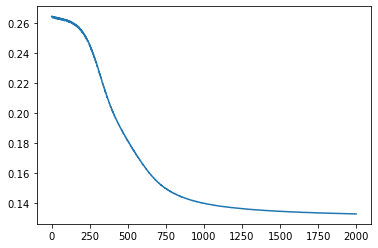

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show

> 처음에는 손실이 점점 감소하다가 어느 시점부터 급격히 감소하고 나중에는 거의 감소하지 않는 S자 곡선을 그린다.
>
> 손실을 시각화하면 **네트워크 학습 현황을 한눈에 파악**할 수 있다.

* y축: loss vs x축: 학습 횟수 (y의 길이)
* plt.plot()에 하나의 변수만 전달하면 그 변수를 y로 간주하고 x는 자동으로 range(len(y))에 해당하는 값을 넣어 그래프를 만든다.

## Boston Housing Dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X)) 
print(train_X[0]) 
print(train_Y[0])

57344/57026 [==============================] - 0s 0us/step
404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


Standardization = (data - mean) / std

In [18]:
# Standardize the data
x_mean = train_X.mean(axis=0) 
x_std = train_X.std(axis=0)

# (data - mean) / std
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0) 
y_std = train_Y.std(axis=0) 
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.782152603377916


In [19]:
# Create Boston Housing Dataset regression model 
model = tf.keras.Sequential([
        # Unit값은 처음에는 큰 수로 넣고 줄여나가는 경우가 많다
        tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)), 
        tf.keras.layers.Dense(units=39, activation='relu'), 
        tf.keras.layers.Dense(units=26, activation='relu'), 
        tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_5 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_6 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Use 25% of data for training
# Callback : 과적합을 막기 위해 학습 중간에 멈추는 과정
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 19ms/step - loss: 6.8502 - val_loss: 0.9527
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5155 - val_loss: 0.6660
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.4356 - val_loss: 0.8741
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4073 - val_loss: 0.3323
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2112 - val_loss: 0.3213
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.2264 - val_loss: 0.4838
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4914 - val_loss: 0.7421
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4945 - val_loss: 0.2917
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2008 - val_loss: 0.2340
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1620 - val_loss: 0.2190
Epoch 11/25
10/10 

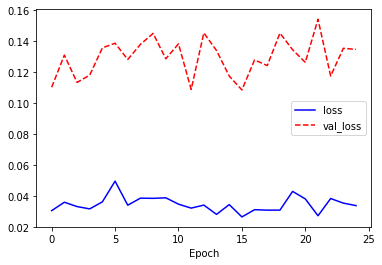

In [11]:
# 과적합이 일어난 그래프

import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], 'b-', label='loss') 
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

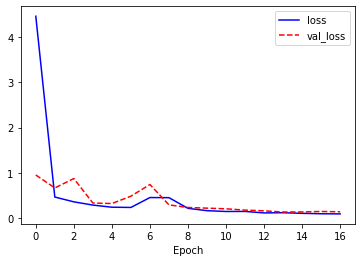

In [21]:
# Callback으로 과적합을 방지한 그래프

import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], 'b-', label='loss') 
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2603


0.26032203435897827

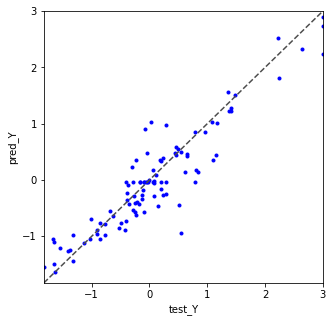

[[-1.4894485e+00]
 [-3.6142641e-01]
 [-7.9048917e-02]
 [ 5.4831153e-01]
 [-4.0792108e-02]
 [-2.6002920e-01]
 [ 8.6094266e-01]
 [-4.0792108e-02]
 [-3.8653442e-01]
 [-2.9085851e-01]
 [-7.2959828e-01]
 [-7.6041043e-01]
 [-7.6046634e-01]
 [ 2.2372627e+00]
 [-4.2188185e-01]
 [-4.0792108e-02]
 [ 3.3412957e-01]
 [-4.0792108e-02]
 [-4.3352666e-01]
 [ 1.0297340e+00]
 [-1.1127460e+00]
 [-9.6653664e-01]
 [-2.8124130e-01]
 [-8.7907618e-01]
 [-4.0792108e-02]
 [ 1.7412491e-01]
 [ 4.9933717e-01]
 [ 1.4613345e-01]
 [-1.2520341e+00]
 [-4.0792108e-02]
 [-2.6304466e-01]
 [-9.4998550e-01]
 [ 1.0068456e+00]
 [ 8.7744489e-02]
 [-5.6207675e-01]
 [-1.6314012e+00]
 [-7.8557557e-01]
 [-4.5463949e-01]
 [-4.0034950e-01]
 [ 3.8473946e-01]
 [ 4.4881299e-01]
 [ 4.6056429e-01]
 [-8.8881481e-01]
 [ 2.3261211e+00]
 [ 3.4790623e-01]
 [-4.0792108e-02]
 [ 4.3183661e-01]
 [-5.3523600e-01]
 [ 3.5493815e-01]
 [-4.0792108e-02]
 [ 1.2330019e+00]
 [-6.2386316e-01]
 [-1.2364172e+00]
 [-1.0389301e+00]
 [ 1.5638621e+00]
 [ 4.40884

In [25]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3") 
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

print(pred_Y)